In [1]:
import networkx as nx
from matplotlib import pyplot as plt

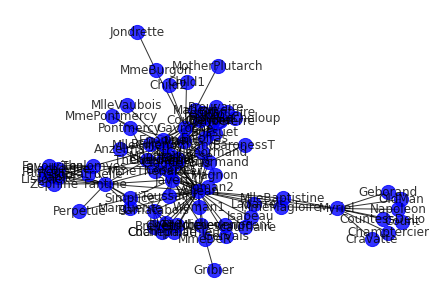

In [2]:
gml_file = "./data/lesmis.gml"
G = nx.readwrite.gml.read_gml(gml_file)
nx.draw_spring(G, node_size=200, node_color='b', with_labels=True, alpha=0.8)

### 可視化の種類

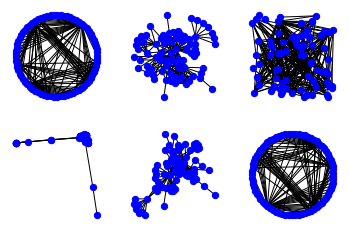

In [3]:
# 頂点を円周上に配置
plt.subplot(231)
nx.draw_circular(G, node_size=40, node_color="b", with_labels=False)

# 頂点を力学モデルにより配置
plt.subplot(232)
nx.draw_kamada_kawai(G, node_size=40,node_color='b', with_labels=False)

# 頂点をランダムに配置
plt.subplot(233)
nx.draw_random(G, node_size=40, node_color='b', with_labels=False)

# 頂点を同心円状に配置
plt.subplot(234)
nx.draw_spectral(G, node_size=40, node_color="b", with_labels=False)

plt.subplot(235)
nx.draw_spring(G, node_size=40, node_color="b", with_labels=False)

plt.subplot(236)
nx.draw_shell(G, node_size=40, node_color="b", with_labels=False)


### 中心性の計算

- 次数中心性（Dgree Centrality）
    - 多くの頂点と繋がっている頂点を中心的とみなすもの
- 固有ベクトル中心性(Eigenvector Centrality)
    - 周囲の頂点の中心性も加味し、多くの中心的な頂点とつながっている頂点を中心的とみなすもの
- 近接中心性（Closeness Centrality）
    - ネットワーク中の他の頂点へ短い距離で到達できる頂点を中心的とみなすもの
- 媒介中心性（Betweenness Centrality）
    - その頂点がなくなると多くの経路が分断されてしまうような頂点を中心とみなすもの

In [4]:
import matplotlib.colors as mcolors

In [7]:
def draw_h(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(
                G, 
                pos, 
                node_size=250,
                cmap=plt.cm.plasma,
                node_color=list(measures.values()),
                nodelist=list(measures.keys()))
    
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

中心性が高いほど明るい色

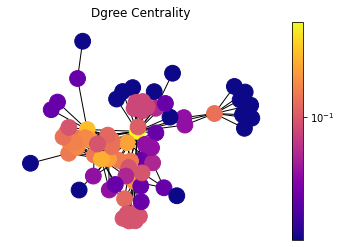

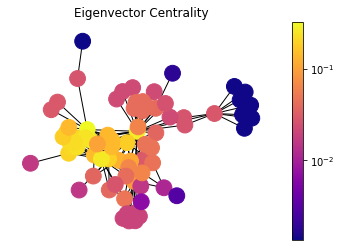

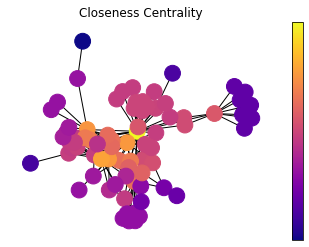

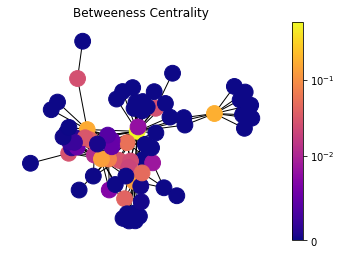

In [8]:
import numpy as np
import numpy.linalg as LA
from pprint import pprint

pos = nx.spring_layout(G)
draw_h(G, pos, nx.degree_centrality(G), 'Dgree Centrality')
draw_h(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')
draw_h(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')
draw_h(G, pos, nx.betweenness_centrality(G), 'Betweeness Centrality')

### 特徴量の計算
- 特徴量とは？
    - 頂点や辺の数など、ネットワークの構造的特徴を表す量のこと  
    - 頂点や辺の数が同じでも、様々な構造のネットワークが考えられる

#### 頂点10の様々なネットワーク

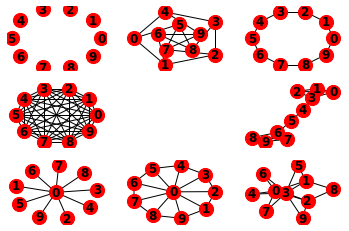

In [13]:
rnd = nx.gnp_random_graph(n=10,p=0,seed=3)
plt.subplot(331)
nx.draw_circular(rnd, node_size=200, node_color='red', with_labels=True, font_weight='bold')

petersen = nx.petersen_graph()
plt.subplot(332)
nx.draw_shell(petersen, nlist=[range(5,10), range(5)], node_size=200, node_color='red', with_labels=True, font_weight='bold')

cycle = nx.cycle_graph(10)
plt.subplot(333)
nx.draw_circular(cycle, node_size=200, node_color='red', with_labels=True, font_weight='bold')

k_10 = nx.complete_graph(10)
plt.subplot(334)
nx.draw_circular(k_10, node_size=200, node_color='red', with_labels=True, font_weight='bold')

# k_5_5 = nx.complete_bipartite_graph(5,5)
# plt.subplot(335)
# nx.draw_circular(k_5_5, nlist=[range(5,10), range(5)], node_size=200, node_color='red', with_labels=True, font_weight='bold')

barbell = nx.barbell_graph(4,2)
plt.subplot(336)
nx.draw_spring(barbell,node_size=200, node_color='red', with_labels=True, font_weight='bold')

star = nx.star_graph(9)
plt.subplot(337)
nx.draw(star, node_size=200, node_color='red', with_labels=True, font_weight='bold')

wheel = nx.wheel_graph(10)
plt.subplot(338)
nx.draw(wheel, node_size=200, node_color='red', with_labels=True, font_weight='bold')

ba = nx.barabasi_albert_graph(10,2)
plt.subplot(339)
nx.draw_spring(ba, node_size=200, node_color='red', with_labels=True, font_weight='bold')


### その他の特徴量
- クラスタ係数
    - 例. ある人の友人2人が友人同士である割合を表す
    - 社会ネットワークではその値が大きく、電力網ネットワークなどでは小さいという性質がある

In [14]:
def draw_m(G, pos):

    nodes = nx.draw_networkx_nodes(G, pos, node_size=200)
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(['density: {:.5}'.format(nx.density(G)), 
                'clustering coefficient: {:.5}'.format(nx.average_clustering(G))])
    plt.axis('off')
    plt.show()

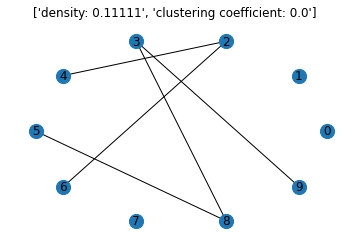

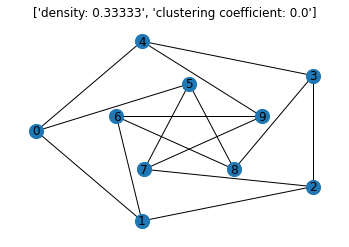

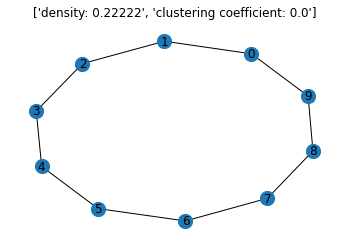

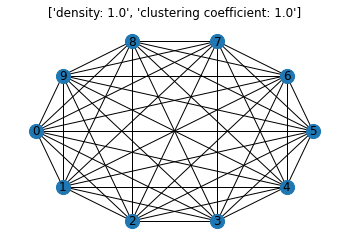

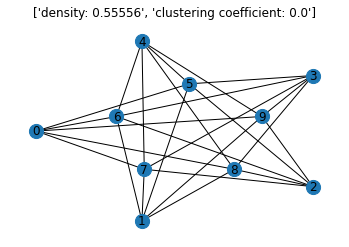

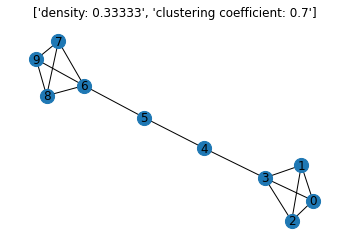

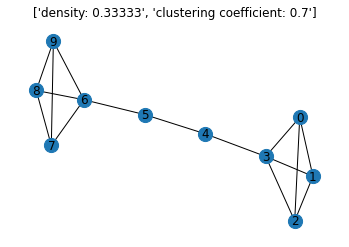

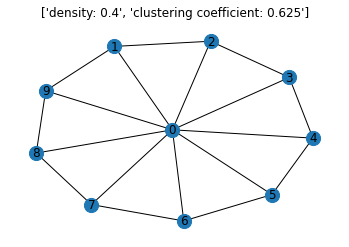

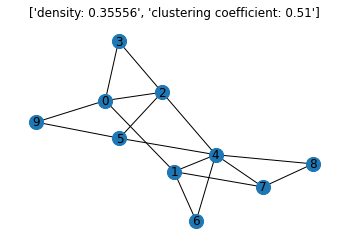

In [15]:
rnd = nx.gnp_random_graph(10,0.1)
pos = nx.circular_layout(rnd)
draw_m(rnd, pos)

petersen = nx.petersen_graph()
pos = nx.shell_layout(petersen, nlist=[range(5,10), range(5)])
draw_m(petersen, pos)

cycle = nx.cycle_graph(10)
pos = nx.spring_layout(cycle)
draw_m(cycle, pos)

k_10 = nx.complete_graph(10)
pos = nx.shell_layout(k_10)
draw_m(k_10, pos)

k_5_5 = nx.complete_bipartite_graph(5,5)
pos = nx.shell_layout(k_5_5, nlist=[range(5,10), range(5)])
draw_m(k_5_5, pos)

barbell = nx.barbell_graph(4,2)
pos = nx.spring_layout(barbell)
draw_m(barbell, pos)


star = nx.barbell_graph(4,2)
pos = nx.spring_layout(star)
draw_m(star, pos)

wheel = nx.wheel_graph(10)
pos = nx.spring_layout(wheel)
draw_m(wheel, pos)

ba = nx.barabasi_albert_graph(10,2)
pos = nx.spring_layout(ba)
draw_m(ba,pos)

### 他の特徴量
- 平均次数
- 平均パス長
- assortavity(次数相関)

## コミュニティの抽出
- 社会ネットワークにおける友人グループのような密に結びついた頂点集合を含むことがある。
このような密な部分ネットワークのことをコミュニティと呼ぶ。
    - 社会ネットワークでのコミュニティ：友人グループ、派閥
    - 代謝ネットワークにおけるコミュニティ：合成や化学反応などによる類似した機能モジュールに対応する
- 類似した頂点がコミュニティを構成することが多いから、嗜好の似ている人々に商品やサービスを推薦する場合、コミュニティ抽出は有用。
    - また、グループでどの頂点が中心的で、どの頂点が他グループとの境界に存在することは情報伝搬における影響力や伝搬の範囲を推測する上で重要
- 抽出するコミュニティの大きさや個数が事前に与えられていない
- 定義がさまざま（例. 頂点が複数のコミュニティに属することを許容するか、階層的な構造か、辺に向きや重みがあるか、動的に変化するかなど）

- 例として、ネットワーク分割によるコミュニティ抽出を行う。
    - モジュラリティと呼ばれる指標に基づくもので、その値を最大にするようにネットワーク分割を求める

In [18]:
import pandas as pd
from networkx.algorithms import community

carac = pd.DataFrame({
    'ID': G.nodes(),
    'myvalue': [0]*len(G.nodes())
})

In [19]:
carac

,ID,myvalue
0,Myriel,0
1,Napoleon,0
2,MlleBaptistine,0
3,MmeMagloire,0
4,CountessDeLo,0
...,...,...
72,Toussaint,0
73,Child1,0
74,Child2,0
75,Brujon,0


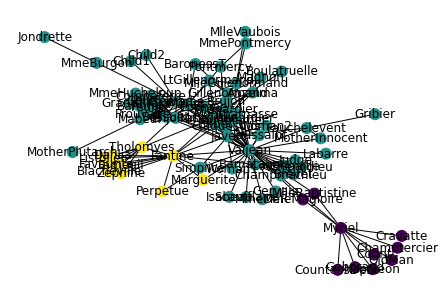

In [20]:
communities_generator = community.centrality.girvan_newman(G)
to_level_communities = next(communities_generator)
nex_level_communities = next(communities_generator)
for m in range(len(nex_level_communities)):
    for n in nex_level_communities[m]:
        carac.loc[carac.ID == n, 'myvalue'] = m
nx.draw_spring(G, node_color=carac['myvalue'], node_size=120, with_labels=True)